In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import warnings
warnings.filterwarnings('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
pd.options.display.max_columns=100

# 2차

[주제] 데이터에 대한 주제 선정 및 분석작업 절차 설계 (문제 정의 및 모델 설계)  


[내용] 첫번째 과제를 통해 데이터에 대한 기본적인 내용과 데이터를 기초로 어떤 주제를 가지고 진행 해야 하는지에 대한 분석과제 설계업무를 진행합니다. 통상 분석과제 설계의 경우 산업별 / 직무별로 첫번째 과제 단계에서 진행하는 경우도 있으나 본 과정에서는 데이터를 보다 깊게 확인하고 해당 데이터를 통해 어떤 인사이트를 얻을 수 있는지에 대한 내용을 정리하는 관점에서 진행됩니다.  


1) 첫번째 과제를 통해 파악된 데이터의 성격을 통한 분석 주제 선정 및 근거 논리 설계  
2) 선정한 주제에 대해 적용 가능한 분석 모델(방법론) 선정 및 선정 근거 논리 작성  
3) PPT 작성, 양식 자유, 최대 10페이지(간지 불요)

In [3]:
df = pd.read_csv('./data.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 부동산 가격에 영향을 미치는 변수들은?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

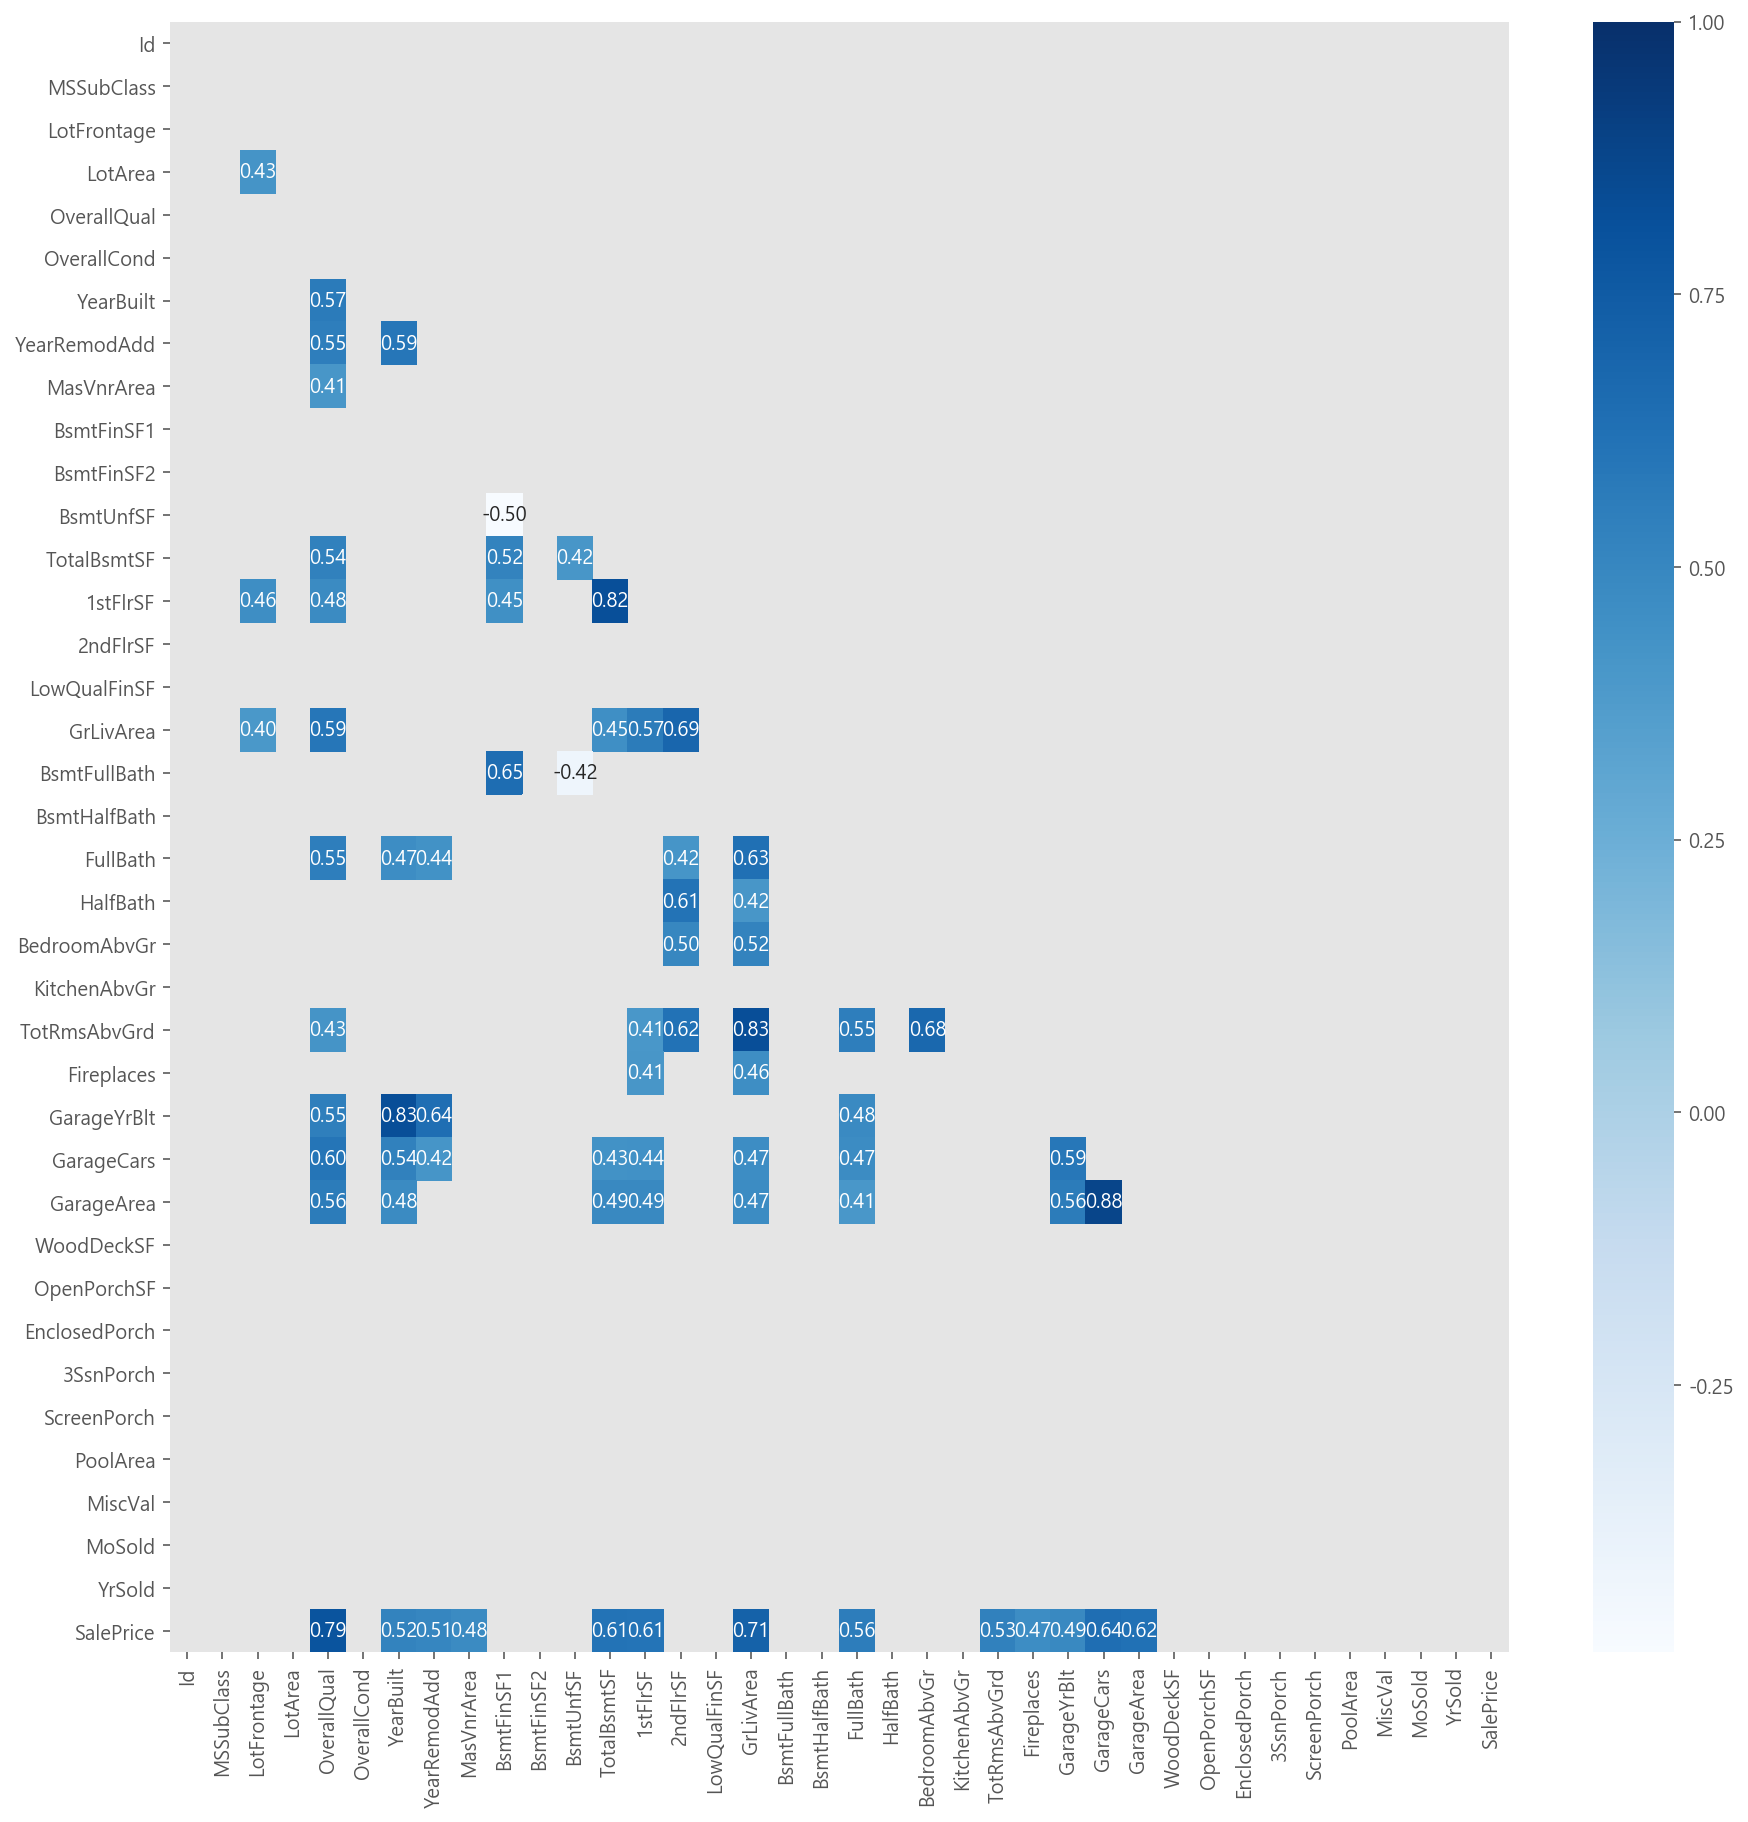

In [5]:
plt.figure(figsize=(15, 15))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr()[(df.corr()>=0.4) | (df.corr()<=-0.4)],
           annot=True,
           annot_kws={'size':10},
           fmt='.2f',
           mask=mask,
           cmap=plt.cm.Blues)

**상관성이 높은 컬럼들**  
**음의 상관관계**  
BsmtUnfSF, BsmtFinSF1 : -0.5  
BsmtFullBath, BsmtUnfSF : -0.42  

**강한 양의 상관관계(0.5이상)**  
GarageArea, GarageCars : 0.88  
GarageYrBlt, YearBuilt : 0.83  
TotRmsAbvGrd, GrLiveArea : 0.83  
1stFlrSF, TotalBsmtSF : 0.82  
SalePrice, OverallQual : 0.79  
SalePrice, GrLiveArea : 0.71  
GrLiveArea, 2ndFlrSF : 0.69  
TotRmsAbvGrd, BedroomAbvGr : 0.68  
BsmtFullBath, BsmtFinSF1 : 0.65  
SalePrice, GarageCars : 0.64  
GarageYrBlt, YearRemodAdd : 0.64  
FullBath, GrLiveArea : 0.63  
SalePrice, GarageArea : 0.62  
TotRmsAbvGrd, 2ndFlrSF : 0.62  
SalePrice, TotalBsmtSF : 0.61  
SalePrice, 1stFlrSF : 0.61  
HalfBath, 2ndFlrSF : 0.61  
GarageCars, GarageYrBlt : 0.59  
YearRemodAdd, YearBuilt : 0.59  
GrLivArea, OverallQual : 0.59  
GrLiveArea, 1stFlrSF : 0.57  
YearBuilt,OverallQual : 0.57  
GarageArea, OverallQual : 0.56  
GarageArea, GarageYrBlt : 0.56  
SalePrice, FullBath : 0.56  
YearRemodAdd, OverallQual : 0.55  
FullBath, OverallQual : 0.55  
GarageYrBlt, OverallQual : 0.55  
TotRmsAbvGrd, FullBath : 0.55  
TotalBsmtSF, OverallQual : 0.54  
GarageCars, YearBuilt : 0.54  
SalePrice, TotRmsAbvGrd : 0.53  
SalePrice, YearBuilt : 0.52  
TotalBsmtSF, BsmtFinSF1 : 0.52  
BedroomAbvGr, GrLiveArea : 0.52   
SalePrice, YearRemodAdd : 0.51  
BedroomAbvGr ,2ndFlrSF : 0.5  

**SalePrice와 상관관계(상관성 0.5이상) 보이는 컬럼**

OverallQual(주택 전체 자재와 마감재에 대한 전반적인 평가)  
GrLivArea(지상 생활공간 평방피트)  
GarageCars(Size of garage in car capacity)  
GarageArea(Size of garage in square feet)  
TotalBsmtSF(Total square feet of basement area)  
1stFlrSF(First Floor square feet)  
FullBath(Full bathrooms above grade)  
TotRmsAbvGrd(Total rooms above grade (does not include bathrooms))  
YearBuilt(Original construction date)  
YearRemodAdd(Remodel date (same as construction date if no remodeling or additions))

## 단순선형회귀분석(연속형 변수)

In [34]:
price_co.head(2)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,181500


In [49]:
x1 = price_co['OverallQual']
y = price_co['SalePrice']

In [51]:
lr1 = lr.fit(pd.DataFrame(x1), y)
pred1 = lr1.predict(pd.DataFrame(x1))
print(lr1.coef_)
print(lr1.intercept_)

[45435.8025931]
-96206.07951476038


In [52]:
# 위 값은 아래 식으로도 도출 가능하다
meanx = np.mean(x1)
meany = np.mean(y)
divisor = np.sum([(i - meanx)**2 for i in x1])
def a(x1, meanx, y, meany):
    sum = 0
    for i in range(len(x1)):
        sum += (x1[i] - meanx)*(y[i] - meany)
    return sum

dividend = a(x1, meanx, y, meany)

print('분자 : ', dividend)
print('분모 : ', divisor)
print('기울기 : %.3f' % (dividend/divisor))
print('y절편 : %.3f' % (meany-(meanx*(dividend/divisor))))

분자 :  126793119.59589031
분모 :  2790.5993150684926
기울기 : 45435.803
y절편 : -96206.080


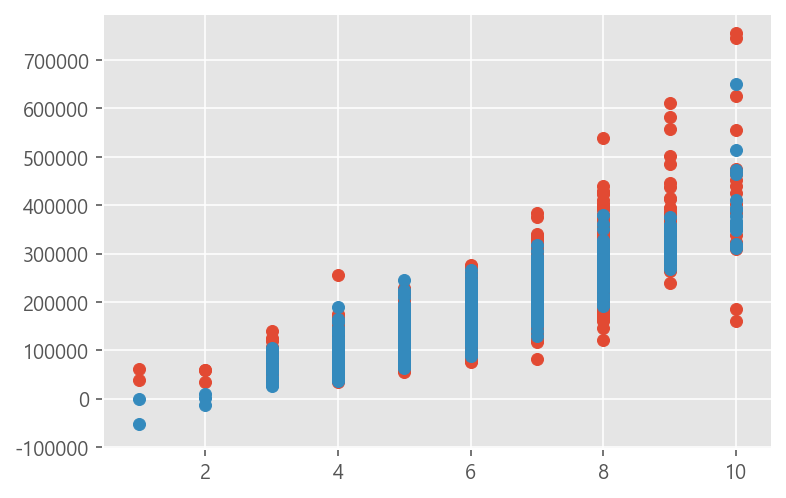

In [58]:
plt.scatter(x1, y)
plt.scatter(x1, pred)

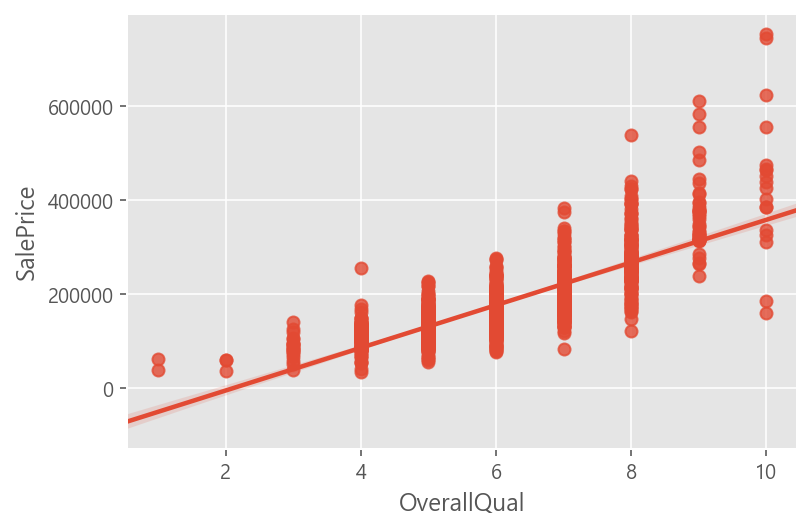

In [54]:
sns.regplot(x1, y)

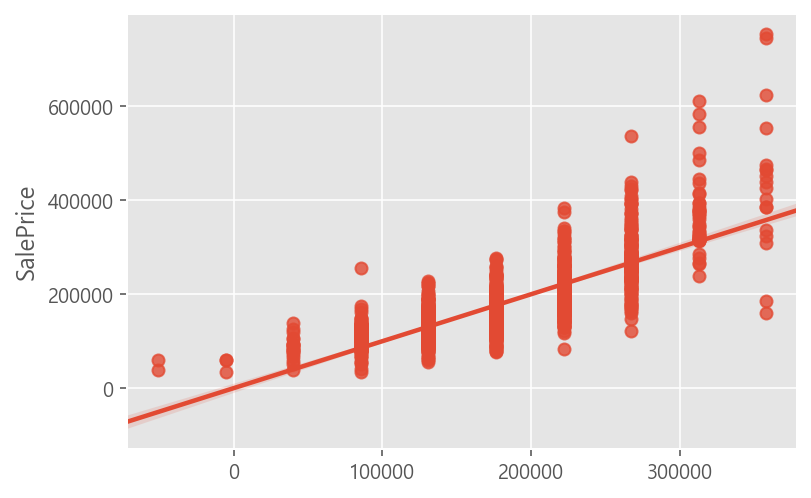

In [55]:
sns.regplot(pred1, y)

## 다중회귀분석(연속형 변수)

### 회귀분석을 위해 SalePrice와 상관성이 있는 컬럼만 따로 변수(price_co)에 담아준다

In [6]:
price_co = df[['OverallQual', 'GrLivArea', 'GarageCars',
              'GarageArea', 'TotalBsmtSF', '1stFlrSF',
              'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
              'YearRemodAdd', 'SalePrice']]
print(price_co.shape)
price_co.head()

(1460, 11)


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,181500
2,7,1786,2,608,920,920,2,6,2001,2002,223500
3,7,1717,3,642,756,961,1,7,1915,1970,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,250000


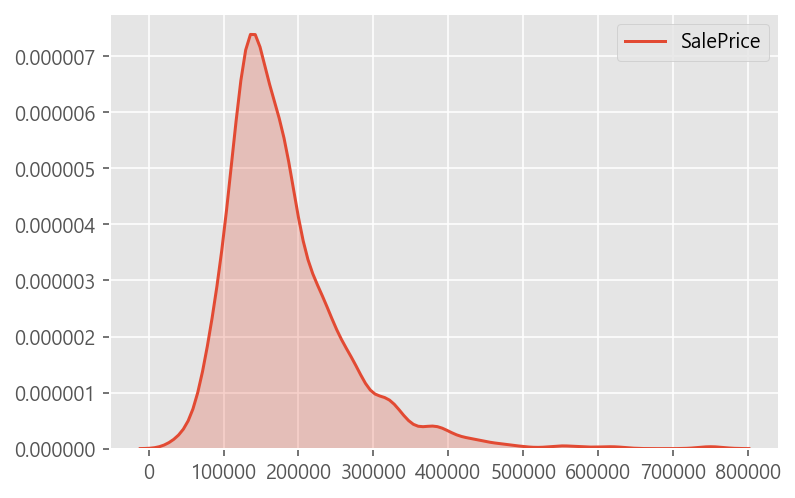

In [7]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df['SalePrice'], shade=True)

In [12]:
from sklearn.linear_model import LinearRegression

In [59]:
# 독립변수 10개, 종속변수 1개
X = price_co.drop(columns=['SalePrice'], axis=1)
y = price_co['SalePrice']

In [60]:
lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X)

In [61]:
pred

array([214741.72468546, 169346.70949012, 220816.47032609, ...,
       227093.91227879, 126047.07735366, 136640.78777021])

#### 직선 식


In [62]:
print(lr.coef_)
print(lr.intercept_)

[ 1.96045898e+04  5.12971178e+01  1.04179010e+04  1.49475334e+01
  1.98650991e+01  1.41737355e+01 -6.79087146e+03  3.31050771e+01
  2.68240707e+02  2.96481161e+02]
-1186193.7666661367


#### 적합도 검증 (결정계수)

In [71]:
# # 잔차
# residuals = y-pred
# # 결정계수
# SSE = (residuals**2).sum()
# SST = ((y-y.mean()**2)).sum()
# R_squared = 1 - (SSE/SST)
# print('R squared = ', R_squared)

In [72]:
# 잔차
residuals = y-pred
residuals.describe()

count    1.460000e+03
mean    -2.049229e-10
std      3.779219e+04
min     -4.899578e+05
25%     -1.931615e+04
50%     -1.948119e+03
75%      1.601953e+04
max      2.905582e+05
Name: SalePrice, dtype: float64

In [35]:
# X2 = price_co['OverallQual']

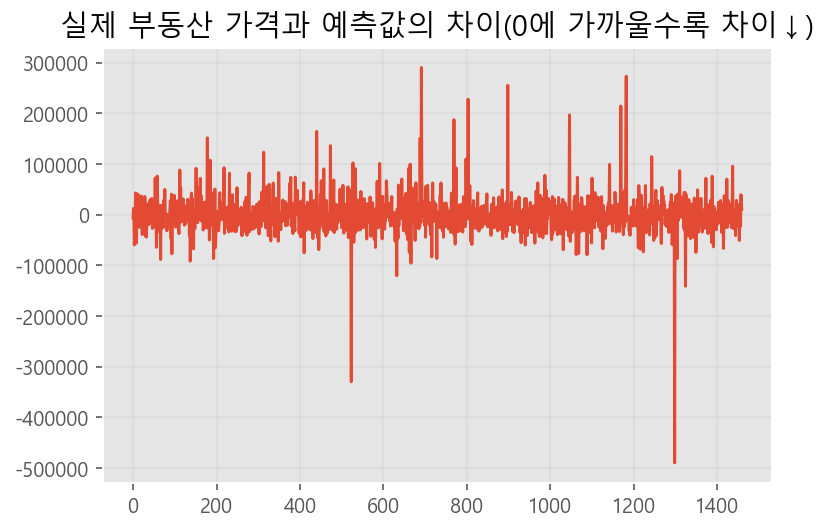

In [89]:
# 잔차
residuals = y-pred
residuals.plot()
plt.title('실제 부동산 가격과 예측값의 차이(0에 가까울수록 차이↓)')
plt.grid(color='lightgrey', alpha=0.5)

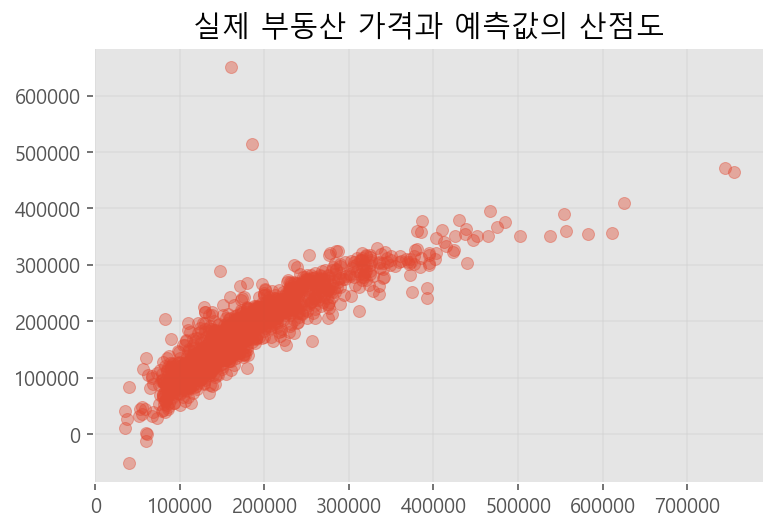

In [90]:
plt.scatter(y, pred, alpha=0.4)
plt.title('실제 부동산 가격과 예측값의 산점도')
plt.grid(color='lightgrey', alpha=0.5)

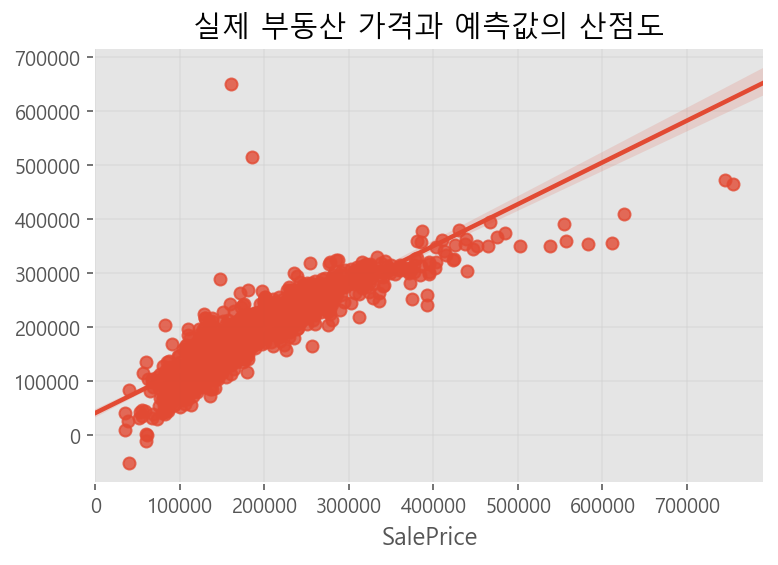

In [91]:
sns.regplot(y, pred)
plt.title('실제 부동산 가격과 예측값의 산점도')
plt.grid(color='lightgrey', alpha=0.5)

In [33]:
from sklearn.metrics import mean_squared_error
print('score = ', lr.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(pred, y))
print('RMSE = ', mean_squared_error(pred, y)**0.5)

score =  0.7736928402773303
Mean_Squared_Error =  1427271411.7217538
RMSE =  37779.24578021316


In [64]:
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
print('r2_score : {:.3f}'.format(lr.score(X, y)))

r2_score : 0.774


In [95]:
X = price_co.drop(columns=['SalePrice'], axis=1)
y = price_co['SalePrice']
mu = np.mean(price_co['SalePrice'])
print(f'결정계수 : {np.sum((pred-mu)**2) / np.sum((y-mu)**2)}')

결정계수 : 0.7736928402773323


In [106]:
# 조정된 결정계수
n = len(y)
s = 10 #독립변수 개수
print(1 - ((np.sum(residuals**2) / (n-s-1)) / 
           (np.sum((y-mu)**2) / (n-1))))

0.772131024130176


In [110]:
from statsmodels.stats.anova import anova_lm
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3

'%.3f'

In [109]:
price_co.head(1)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,208500


In [111]:
price_co.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'SalePrice'],
      dtype='object')

In [128]:
price = price_co.copy()
price.rename(columns={'1stFlrSF':'FirstFlrSF'}, inplace=True)

In [130]:
lm_continuous = smf.ols(
    "SalePrice ~ OverallQual + GrLivArea + GarageCars +\
    GarageArea + TotalBsmtSF + FirstFlrSF + FullBath +\
    TotRmsAbvGrd + YearBuilt + YearRemodAdd", 
    data=price).fit()

In [131]:
lm_continuous.params

Intercept      -1.186194e+06
OverallQual     1.960459e+04
GrLivArea       5.129712e+01
GarageCars      1.041790e+04
GarageArea      1.494753e+01
TotalBsmtSF     1.986510e+01
FirstFlrSF      1.417374e+01
FullBath       -6.790871e+03
TotRmsAbvGrd    3.310508e+01
YearBuilt       2.682407e+02
YearRemodAdd    2.964812e+02
dtype: float64

In [133]:
lm_continuous.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:57:04   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.186e+06   1.29e+05     -9.187      0.000   -1.44e+06   -9.33e+05
OverallQual    1.96e+04   1190.159     16.472      0.000    1.73e+04    2.19e+04
GrLivArea       51.2971      4.233     12.119      0.000      42.994      59.600
GarageCars    1.042e+04   3044.272      3.422      0.001    4446.249    1.64e+04
GarageArea      14.9475     10.311      1.450      0.147      -5.279      35.174
TotalBsmtSF     19.8651      4.295      4.625      0.000      11.439      28.291
FirstFlrSF      14.1737      4.930      2.875      0.004       4.504      23.844
FullBath     -6790.8715   2682.369     -2.532      0.011   -1.21e+04   -1529.130
TotRmsAbvGrd    33.1051   1119.061      0.030      0.976   -2162.048    2228.258
YearBuilt      268.2407     50.346      5.328      0.000     169.481     367.000
YearRemodAdd   296.4812     63.635      4.659      0.000     171.655     421.307
==============================================================================
Omnibus:                      477.814   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58906.279
Skew:                          -0.412   Prob(JB):                         0.00
Kurtosis:                      34.107   Cond. No.                     4.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 범주형 변수 분산분석

In [163]:
df_obj = df[['Neighborhood', 'BsmtQual', 'BsmtFinType1',
   'HeatingQC', 'GarageFinish', 'KitchenQual', 'SalePrice']].copy()
df_obj.shape

(1460, 7)

##### neighborhood

In [169]:
anova_model = smf.ols(
    "SalePrice ~ Neighborhood", df_obj).fit()
sm.stats.anova_lm(anova_model, typ=2)

,sum_sq,df,F,PR(>F)
Neighborhood,5.023606e+12,24.0,71.784865,1.558600e-225
Residual,4.184305e+12,1435.0,NaN,NaN


In [170]:
1.558600e-225

0.000

In [172]:
anova_model = smf.ols(
    "SalePrice ~ BsmtQual", df_obj).fit()
sm.stats.anova_lm(anova_model, typ=2)

,sum_sq,df,F,PR(>F)
BsmtQual,4.066554e+12,3.0,392.913506,9.610615e-186
Residual,4.895429e+12,1419.0,NaN,NaN


In [173]:
9.610615e-186

0.000

In [175]:
anova_model = smf.ols(
    "SalePrice ~ BsmtFinType1", df_obj).fit()
sm.stats.anova_lm(anova_model, typ=2)

,sum_sq,df,F,PR(>F)
BsmtFinType1,1.726056e+12,5.0,67.602175,1.807731e-63
Residual,7.235927e+12,1417.0,NaN,NaN


In [176]:
1.807731e-63

0.000

In [178]:
anova_model = smf.ols(
    "SalePrice ~ HeatingQC", df_obj).fit()
sm.stats.anova_lm(anova_model, typ=2)

,sum_sq,df,F,PR(>F)
HeatingQC,1.800151e+12,4.0,88.394462,2.667062e-67
Residual,7.407760e+12,1455.0,NaN,NaN


In [180]:
2.667062e-67

0.000

In [181]:
anova_model = smf.ols(
    "SalePrice ~ GarageFinish", df_obj).fit()
sm.stats.anova_lm(anova_model, typ=2)

,sum_sq,df,F,PR(>F)
GarageFinish,2.299993e+12,2.0,250.962467,1.199117e-93
Residual,6.305307e+12,1376.0,NaN,NaN


In [184]:
1.199117e-93

0.000

In [182]:
anova_model = smf.ols(
    "SalePrice ~ KitchenQual", df_obj).fit()
sm.stats.anova_lm(anova_model, typ=2)

,sum_sq,df,F,PR(>F)
KitchenQual,4.204320e+12,3.0,407.806352,3.032213e-192
Residual,5.003592e+12,1456.0,NaN,NaN


In [183]:
3.032213e-192

0.000

In [185]:
df_obj['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64